# PREDICTION OF POPULARITY OF NEWS IN SOCIAL MEDIA PLATFORM

## Introduction and Understanding the dataset

Many advertisements and news get displayed in differrnt social media platforms such as Facebook, Google+, LinkedIn, 
Instagram, Youtube etc. 

The aim is to predict the popularity of the news posted in different Social Media Platforms.

### About the Dataset

This is a large data set of news items and their respective social feedback on multiple platforms: Facebook, Google+ and LinkedIn.
The collected data relates to a period of 8 months, between November 2015 and July 2016, accounting for about 100,000 news items on four different topics: economy, microsoft, obama and palestine.
This data set is tailored for evaluative comparisons in predictive analytics tasks, although allowing for tasks in other research areas such as topic detection and tracking, sentiment analysis in short text, first story detection or news recommendation. 
We are predicting only news posted on Facebook as of now. 


#### VARIABLES OF SOCIAL FEEDBACK DATA #


IDLink (numeric): Unique identifier of news items

TS1 (numeric): Level of popularity in time slice 1 (0-20 minutes upon publication)

TS2 (numeric): Level of popularity in time slice 2 (20-40 minutes upon publication)

TS... (numeric): Level of popularity in time slice ...

TS144 (numeric): Final level of popularity after 2 days upon publication

## Importing the Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Reading Dataset from the CSV File

In [7]:
data = pd.read_csv("Facebook_Economy.csv")
data.head()

,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,1,-1,-1,-1,-1,-1,-1,-1,-1,7,...,13,13,13,13,13,13,13,13,13,13
1,2,-1,-1,-1,-1,-1,-1,-1,-1,3,...,42,42,42,42,42,42,42,42,42,42
2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,98,98,98,98,98,98,98,98,98,98
3,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,7,7,7,7,7,7,7,7,7,7
4,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,34,34,34,34,34,34,34,34,34,34


This is how the data looks. The dimensions of the dataset is:

In [8]:
data.shape

(29928, 145)

## Checking if there are any missing values in the data

In [9]:
print(data.isnull().any())

IDLink    False
TS1       False
TS2       False
TS3       False
TS4       False
TS5       False
TS6       False
TS7       False
TS8       False
TS9       False
TS10      False
TS11      False
TS12      False
TS13      False
TS14      False
TS15      False
TS16      False
TS17      False
TS18      False
TS19      False
TS20      False
TS21      False
TS22      False
TS23      False
TS24      False
TS25      False
TS26      False
TS27      False
TS28      False
TS29      False
          ...  
TS115     False
TS116     False
TS117     False
TS118     False
TS119     False
TS120     False
TS121     False
TS122     False
TS123     False
TS124     False
TS125     False
TS126     False
TS127     False
TS128     False
TS129     False
TS130     False
TS131     False
TS132     False
TS133     False
TS134     False
TS135     False
TS136     False
TS137     False
TS138     False
TS139     False
TS140     False
TS141     False
TS142     False
TS143     False
TS144     False
Length: 145, dtype: bool

And this is how the dataset is distributed which is as shown below:

In [5]:
data.describe()

,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
count,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,...,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000
mean,27579.985532,-0.420710,0.019814,2.061080,2.586240,2.994988,3.285251,3.813085,4.345295,4.701751,...,44.256750,44.341687,44.512597,44.618818,44.717221,44.804431,44.888466,45.117482,45.233995,45.335739
std,16591.086104,13.396052,17.077407,282.216546,282.299425,282.506177,282.603609,282.842387,284.130729,284.520470,...,406.520808,406.684954,407.876993,408.702349,409.022775,409.363348,409.733246,411.139678,411.472159,411.823251
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,13370.250000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26011.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,42584.250000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.000000,16.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
max,58447.000000,1885.000000,1885.000000,48711.000000,48711.000000,48711.000000,48711.000000,48711.000000,48711.000000,48711.000000,...,49211.000000,49211.000000,49211.000000,49211.000000,49211.000000,49211.000000,49211.000000,49211.000000,49211.000000,49211.000000


## Training the model

In [10]:
import tensorflow as tf
from tensorflow.python import keras
from sklearn.model_selection import train_test_split

## Normalizing the data

In [11]:
final_data = data
final_data = (final_data - final_data.min()) / (final_data.max() - final_data.min())

# Picking all columns other than the last one as X
Y = np.array(final_data['IDLink'])
X = np.array(final_data.drop(['IDLink'],axis=1))


Split the data into respective test and train.


In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2)

Defining the network.

In [13]:
model = keras.models.Sequential([
    keras.layers.Dense(37,input_shape=(xtrain[0].shape), activation=tf.nn.tanh,  kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(1)
])

In [24]:
model.compile(loss='mse',optimizer=keras.optimizers.Adam(0.001),metrics=['mae'])

Training the model.

In [32]:
history=model.fit(xtrain,ytrain,epochs=10,verbose=2)

Epoch 1/10
 - 1s - loss: 0.0807 - mean_absolute_error: 0.2460
Epoch 2/10
 - 1s - loss: 0.0807 - mean_absolute_error: 0.2459
Epoch 3/10
 - 1s - loss: 0.0807 - mean_absolute_error: 0.2460
Epoch 4/10
 - 1s - loss: 0.0807 - mean_absolute_error: 0.2459
Epoch 5/10
 - 1s - loss: 0.0807 - mean_absolute_error: 0.2460
Epoch 6/10
 - 1s - loss: 0.0807 - mean_absolute_error: 0.2460
Epoch 7/10
 - 1s - loss: 0.0807 - mean_absolute_error: 0.2460
Epoch 8/10
 - 1s - loss: 0.0807 - mean_absolute_error: 0.2460
Epoch 9/10
 - 1s - loss: 0.0807 - mean_absolute_error: 0.2460
Epoch 10/10
 - 1s - loss: 0.0807 - mean_absolute_error: 0.2460


Plotting the loss curve.

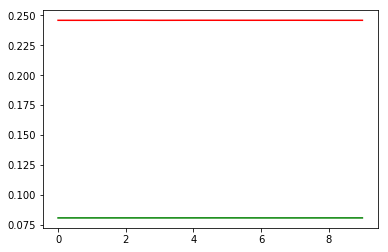

In [39]:
plt.plot(history.epoch,history.history['loss'],'g')
plt.plot(history.epoch,history.history['mean_absolute_error'],'r')

## Model Efficency

|   MSE    |    MAE   | 
|----------|----------|
|  0.0038  |  0.0143  |


## Testing the model

In [34]:
model.evaluate(xtest,ytest)

5986/5986 [==============================] - 0s 22us/step


[0.08025138764827323, 0.24504603581945514]

In [35]:
z = model.predict(xtrain[:5])

In [36]:
yt = ytrain[:5].reshape(5,1)

In [37]:
m = np.subtract(z,yt)

This is the mean_absolute_error for test data of five rows

In [40]:
m.mean()

0.14589771933368442